## Bike Sharing Assignment

In [1]:
# import depended libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ignore warnings
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler 

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

### 1. Data Reading & Understanding

In [2]:
# Loading the loan data and converting into dataframe
df=pd.read_csv(r"C:\Users\pragyanshree.a.das\Downloads\day.csv")

In [3]:
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [4]:
df.shape

(730, 16)

In [5]:
# To check if there is any null values.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
# We can see that there is no null values present in data.


In [9]:
# Here data looks with in the permissiable ranage.
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [10]:
#Delete  Unnessasry columns:

In [11]:
# 1. From above analysis we can see that the columns instant is unique in nature and act like a id which will not participate
#in analysis. Hence we can drop them.
# we can also see that only dtedat is of object type while others attribute is of int/float type.
# Since we already having month and year so we can drop dteday columns.


In [12]:
print("Total columns with values NA: ", len(df.columns[df.isna().all()].tolist()))


Total columns with values NA:  0


In [13]:
 #Lets delete all the columns which value is uniqe in nature.

unique_columns = [col for col in df.columns if df[col].nunique() == len(df)]
unique_columns

['instant', 'dteday']

In [14]:
dropped_columns=['instant','dteday']
df.drop(dropped_columns,axis=1,inplace=True)
df.shape


(730, 14)

In [15]:
# Checking  if there any duplicates row. 

In [16]:
duplicate_rows = len(df[df.duplicated()])
print("Count of duplicate rows:",round(duplicate_rows,2))

Count of duplicate rows: 0


In [17]:
# No duplicaets rows found.


In [18]:
# Transforming the Data

In [19]:
# Form data dictionary and abvoe analysis we can say that  season, weathersit & month are catogorical values but found as int.
#Lets Convert season, weathersit & month to Catogory type
df['season']=df['season'].astype('category')
df['weathersit']=df['weathersit'].astype('category')
df['mnth']=df['mnth'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    int64   
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  casual      730 non-null    int64   
 12  registered  730 non-null    int64   
 13  cnt         730 non-null    int64   
dtypes: category(3), float64(4), int64(7)
memory usage: 65.7 KB


In [20]:
df.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)
df.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace = True)

df.mnth = df.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})

df.weekday = df.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,0,jan,0,sat,0,moderate,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,0,jan,0,sun,0,moderate,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,0,jan,0,mon,1,good,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,0,jan,0,tue,1,good,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,0,jan,0,wed,1,good,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### 2. EDA

#### Univariate analysis

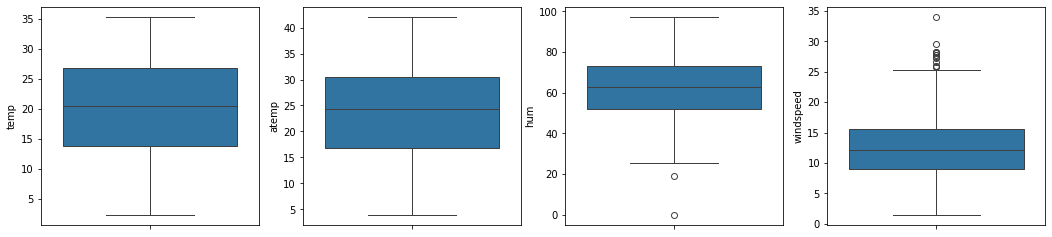

In [21]:
# Lets check if any outliers present is numeric featires.
# raw box plots for indepent variables with continuous values
cols = ['temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize=(18,4))

k = 1
for col in cols:
    plt.subplot(1,4,k)
    sns.boxplot(y=col, data=df)
    k+=1

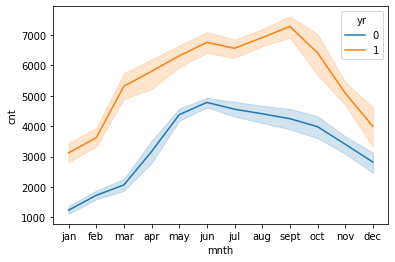

In [22]:
# Line graph will that show the count vs month for year 2018 and 2019.
sns.lineplot(x = "mnth", y = "cnt", data=df,hue = "yr")
plt.show() 

In [23]:
# Inferences:
# 1. From Line Graph we can see that target Variable cnt has increased from 2018 to 2019.
# 2. Demand for bike is high between may to oct for year 2018 and 2019.
# 3. From Boxchart we can also see that there is no outliers present.

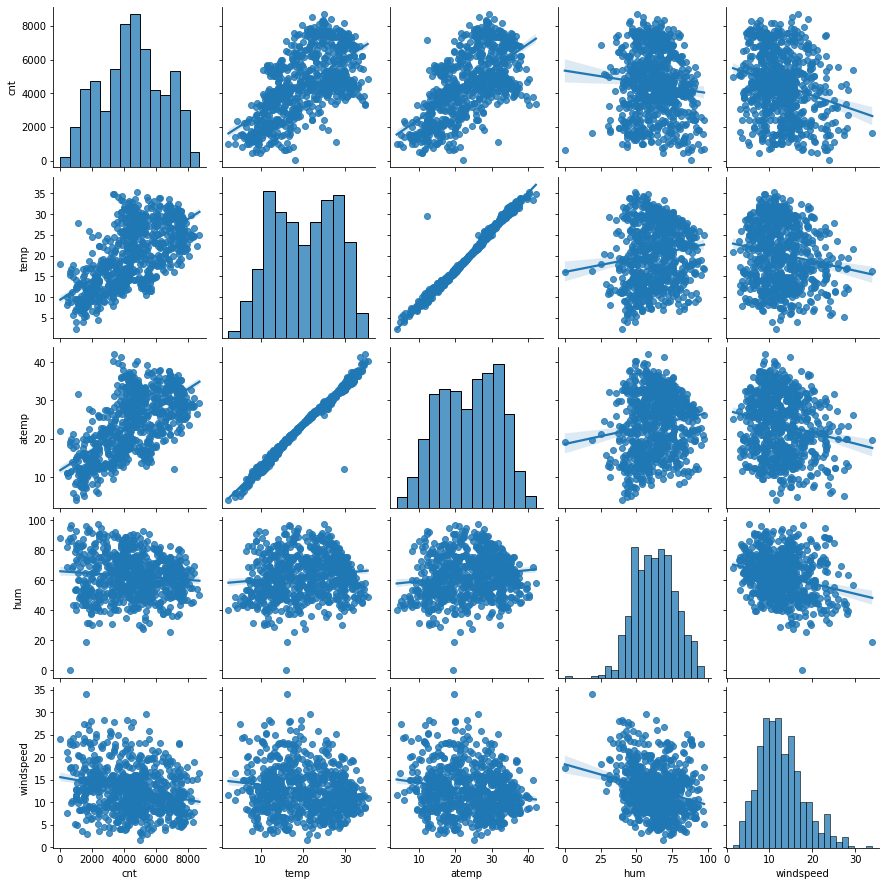

In [24]:
# Lets plot pairplots to have better to see if cnt is linearly  depend upon is independet variables. 
numerical_variabels=['cnt', 'temp', 'atemp', 'hum','windspeed']
sns.pairplot(data=df,vars=numerical_variabels, kind="reg")
plt.show()

In [25]:
# Inferences:
# 1. We can see that we have linealy dependecy between temp, atemp and count.
# 2. we can also see that temp and atemp is highly correlated.

####  Bivariate analysis

In [26]:
#  Barcharts for categorical variables to see demands

In [27]:
# function to create barplot related to categorical columns

def plot_bar_graphs(column):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.barplot(x=column, y='cnt', data=df)
    plt.title(f'Bar Plot of {column} vs cnt')
    
    plt.subplot(1, 2, 2)
    sns.barplot(x=column, y='cnt', data=df, hue='yr', palette='Set1')
    plt.title(f'Bar Plot of {column} vs cnt (2018 vs 2019)')
    plt.legend(title='yr', labels=['2018', '2019'])
    
    plt.tight_layout()
    plt.show()

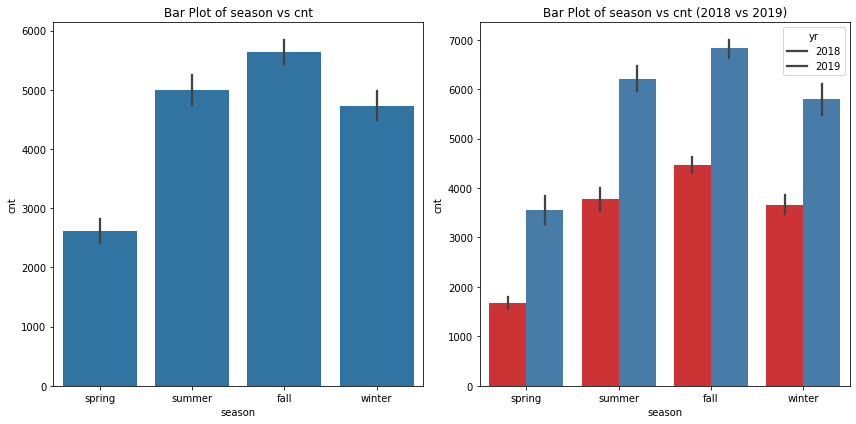

In [28]:
plot_bar_graphs('season')

In [29]:
# Inferences:
# 1. Fall  seasons is having high number bike rental.
# 2. Bike rental in 2019 has increaded for every seasion compared to 2018.

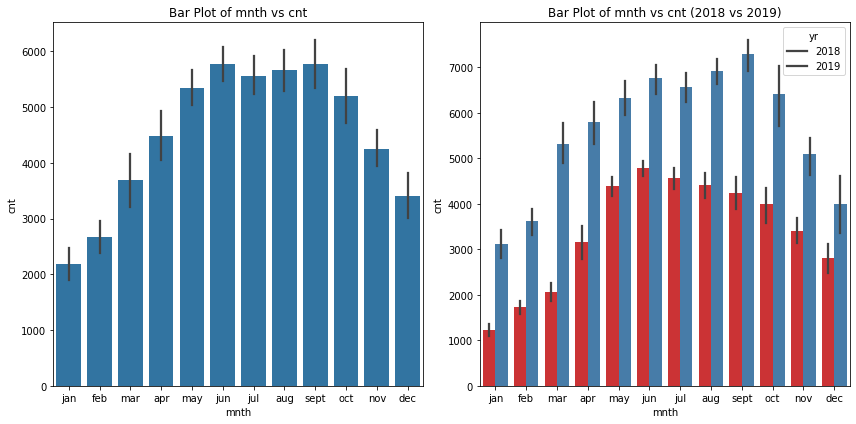

In [30]:
plot_bar_graphs('mnth')

In [31]:
# Inferences:
# 1. May to oct is having number of bike registration.
# 2. Bike registration in 2019 has increaded for every month compared to 2018.

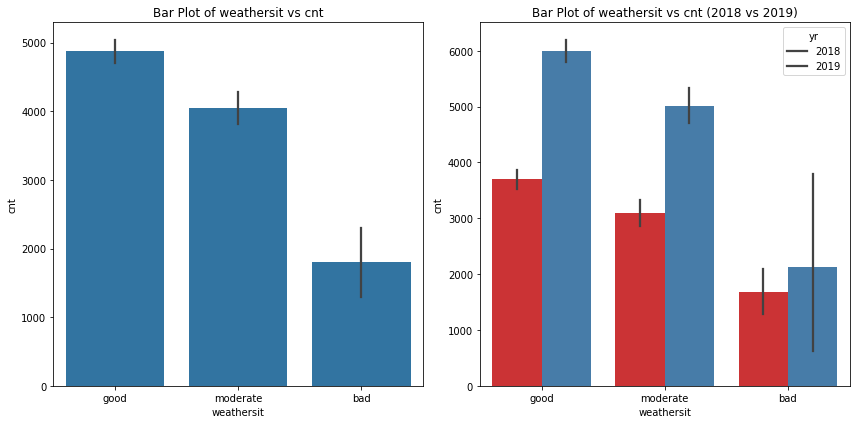

In [32]:
plot_bar_graphs('weathersit')

In [33]:
# Inferences:
# 1. People prefer bike rental when weather situations is good. 
# 2. Bike registration in 2019 has increaded  for every weather situtation 2018.

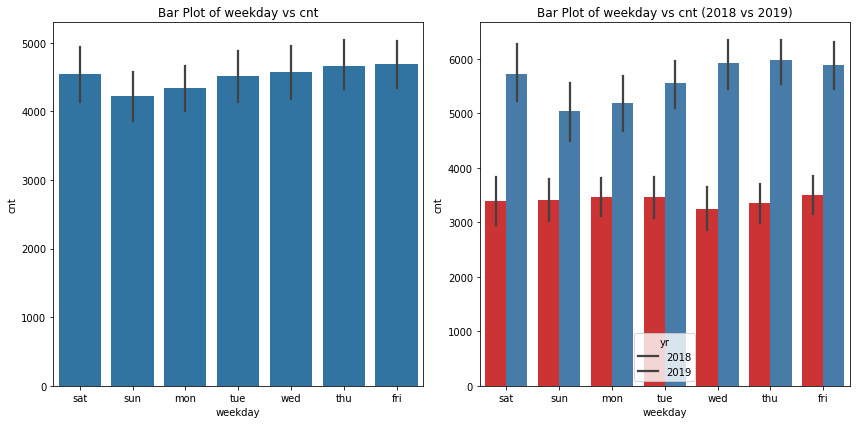

In [34]:
plot_bar_graphs('weekday')

In [35]:
# Inferences:
# 1. People don't prefer bike rental on weekends. 


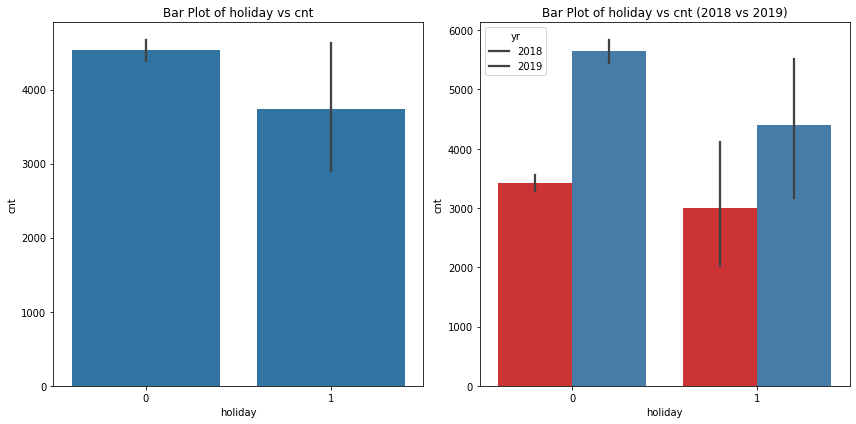

In [36]:
plot_bar_graphs('holiday')


In [37]:
# Inferences:
# 1. People dont prefer renting bike holiday.

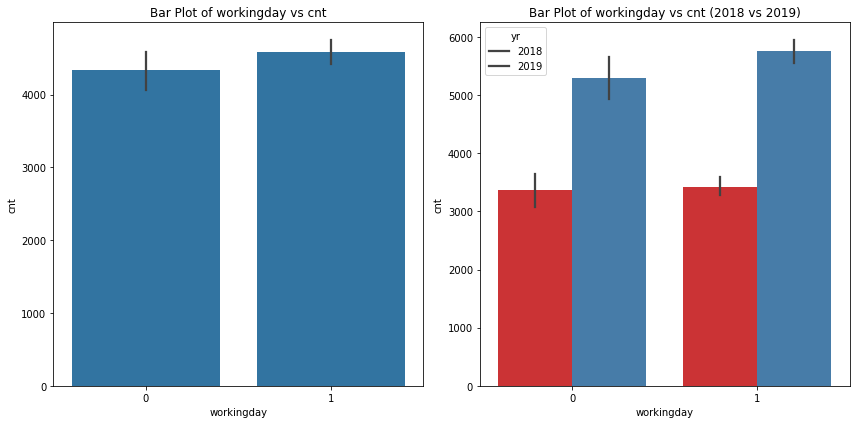

In [38]:
plot_bar_graphs('workingday')

In [39]:
# Inferences:
# 1. People prefer bike rental on working days.

In [40]:
# Lets draw heatMap to indentify is there any correlation.


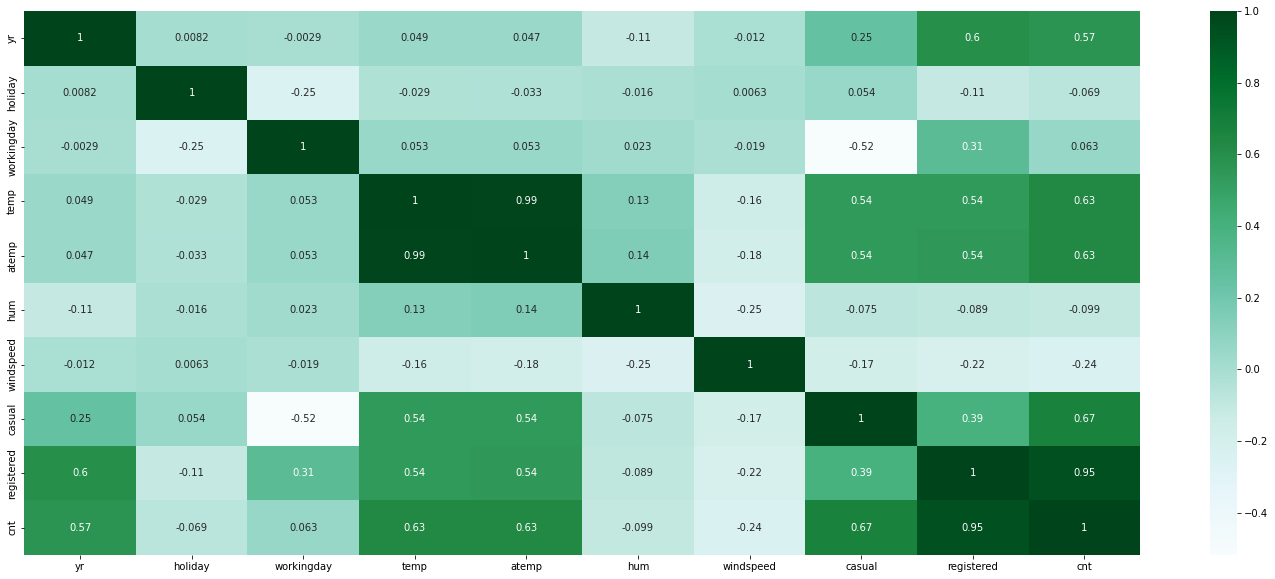

In [41]:
# Lets plot the corrlation matrix(heatmap)
plt.figure(figsize=(25,10))
sns.heatmap(df.corr(), cmap='BuGn', annot = True)
plt.show()

In [42]:
#Inferences from heatmap: 
#1. Since Count is sum of casual and registed. That we can infer from  heatmap as casual and registered are highly correleted with cnt. 
#2. holiday, hum, and windspeed is negatively correlated. 
#3. Indepedent variable temp and atemp is highly correlated(0.99).This show that there is high possiblity that one may have derived from another,One of the them can be dropped. Will use VIP and p values to drop this.

In [43]:
df.shape

(730, 14)

In [44]:
# Dropping casual and Registed as  they sumed to Cnt.

df.drop(['casual','registered'],axis=1,inplace=True)

In [45]:

df.shape

(730, 12)

## 3. Data Preparation

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    object  
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(3), float64(4), int64(4), object(1)
memory usage: 54.3+ KB


#### Creating dummy variables for catogorical variables.

In [47]:
# we need to create a dummy variables for four categorical variables. mnth', 'weekday', 'season' & 'weathersit

In [48]:
df = pd.get_dummies(df, drop_first=True)

In [49]:
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_summer,season_fall,...,mnth_nov,mnth_dec,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_moderate,weathersit_bad
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,0,0,0,1,0,0


In [50]:
# Divide the train and test data
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size=0.75, test_size=0.25, random_state=100)

In [51]:
df_train.shape


(547, 30)

In [52]:
df_test.shape

(183, 30)

#### Scaling numeric variables 

In [53]:
#scaling numeric variables of traning data using MinMaxScalor between 0-1.
num_vars =  ['temp', 'atemp', 'hum', 'windspeed','cnt']
scaler=MinMaxScaler()

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [54]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_summer,season_fall,...,mnth_nov,mnth_dec,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_moderate,weathersit_bad
311,0,0,1,0.435124,0.437339,0.743667,0.057471,0.481247,0,0,...,1,0,0,0,0,0,1,0,0,0
523,1,0,1,0.735215,0.680985,0.482181,0.286093,0.887483,1,0,...,0,0,0,0,0,0,0,0,0,0
381,1,0,1,0.391151,0.374375,0.737917,0.659615,0.335136,0,0,...,0,0,0,0,0,0,1,0,1,0
413,1,0,0,0.358285,0.362754,0.550880,0.319514,0.494248,0,0,...,0,0,0,1,0,0,0,0,0,0
253,0,0,0,0.740406,0.695906,0.735509,0.156398,0.578003,0,1,...,0,0,0,0,1,0,0,0,0,0


In [55]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_summer,season_fall,...,mnth_nov,mnth_dec,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_moderate,weathersit_bad
count,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,...,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000
mean,0.508227,0.027422,0.669104,0.535543,0.511400,0.650673,0.319317,0.511382,0.244973,0.252285,...,0.082267,0.087751,0.153565,0.151737,0.151737,0.131627,0.135283,0.151737,0.349177,0.027422
std,0.500390,0.163460,0.470966,0.225446,0.211788,0.144515,0.169239,0.225008,0.430465,0.434722,...,0.275022,0.283192,0.360861,0.359094,0.359094,0.338394,0.342339,0.359094,0.477146,0.163460
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.336998,0.326287,0.538858,0.197844,0.350437,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.535847,0.521862,0.655216,0.294101,0.514266,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.753113,0.413761,0.682697,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [56]:
# From above analysis we can see that numeric variabels has scaled between 0 and 1.


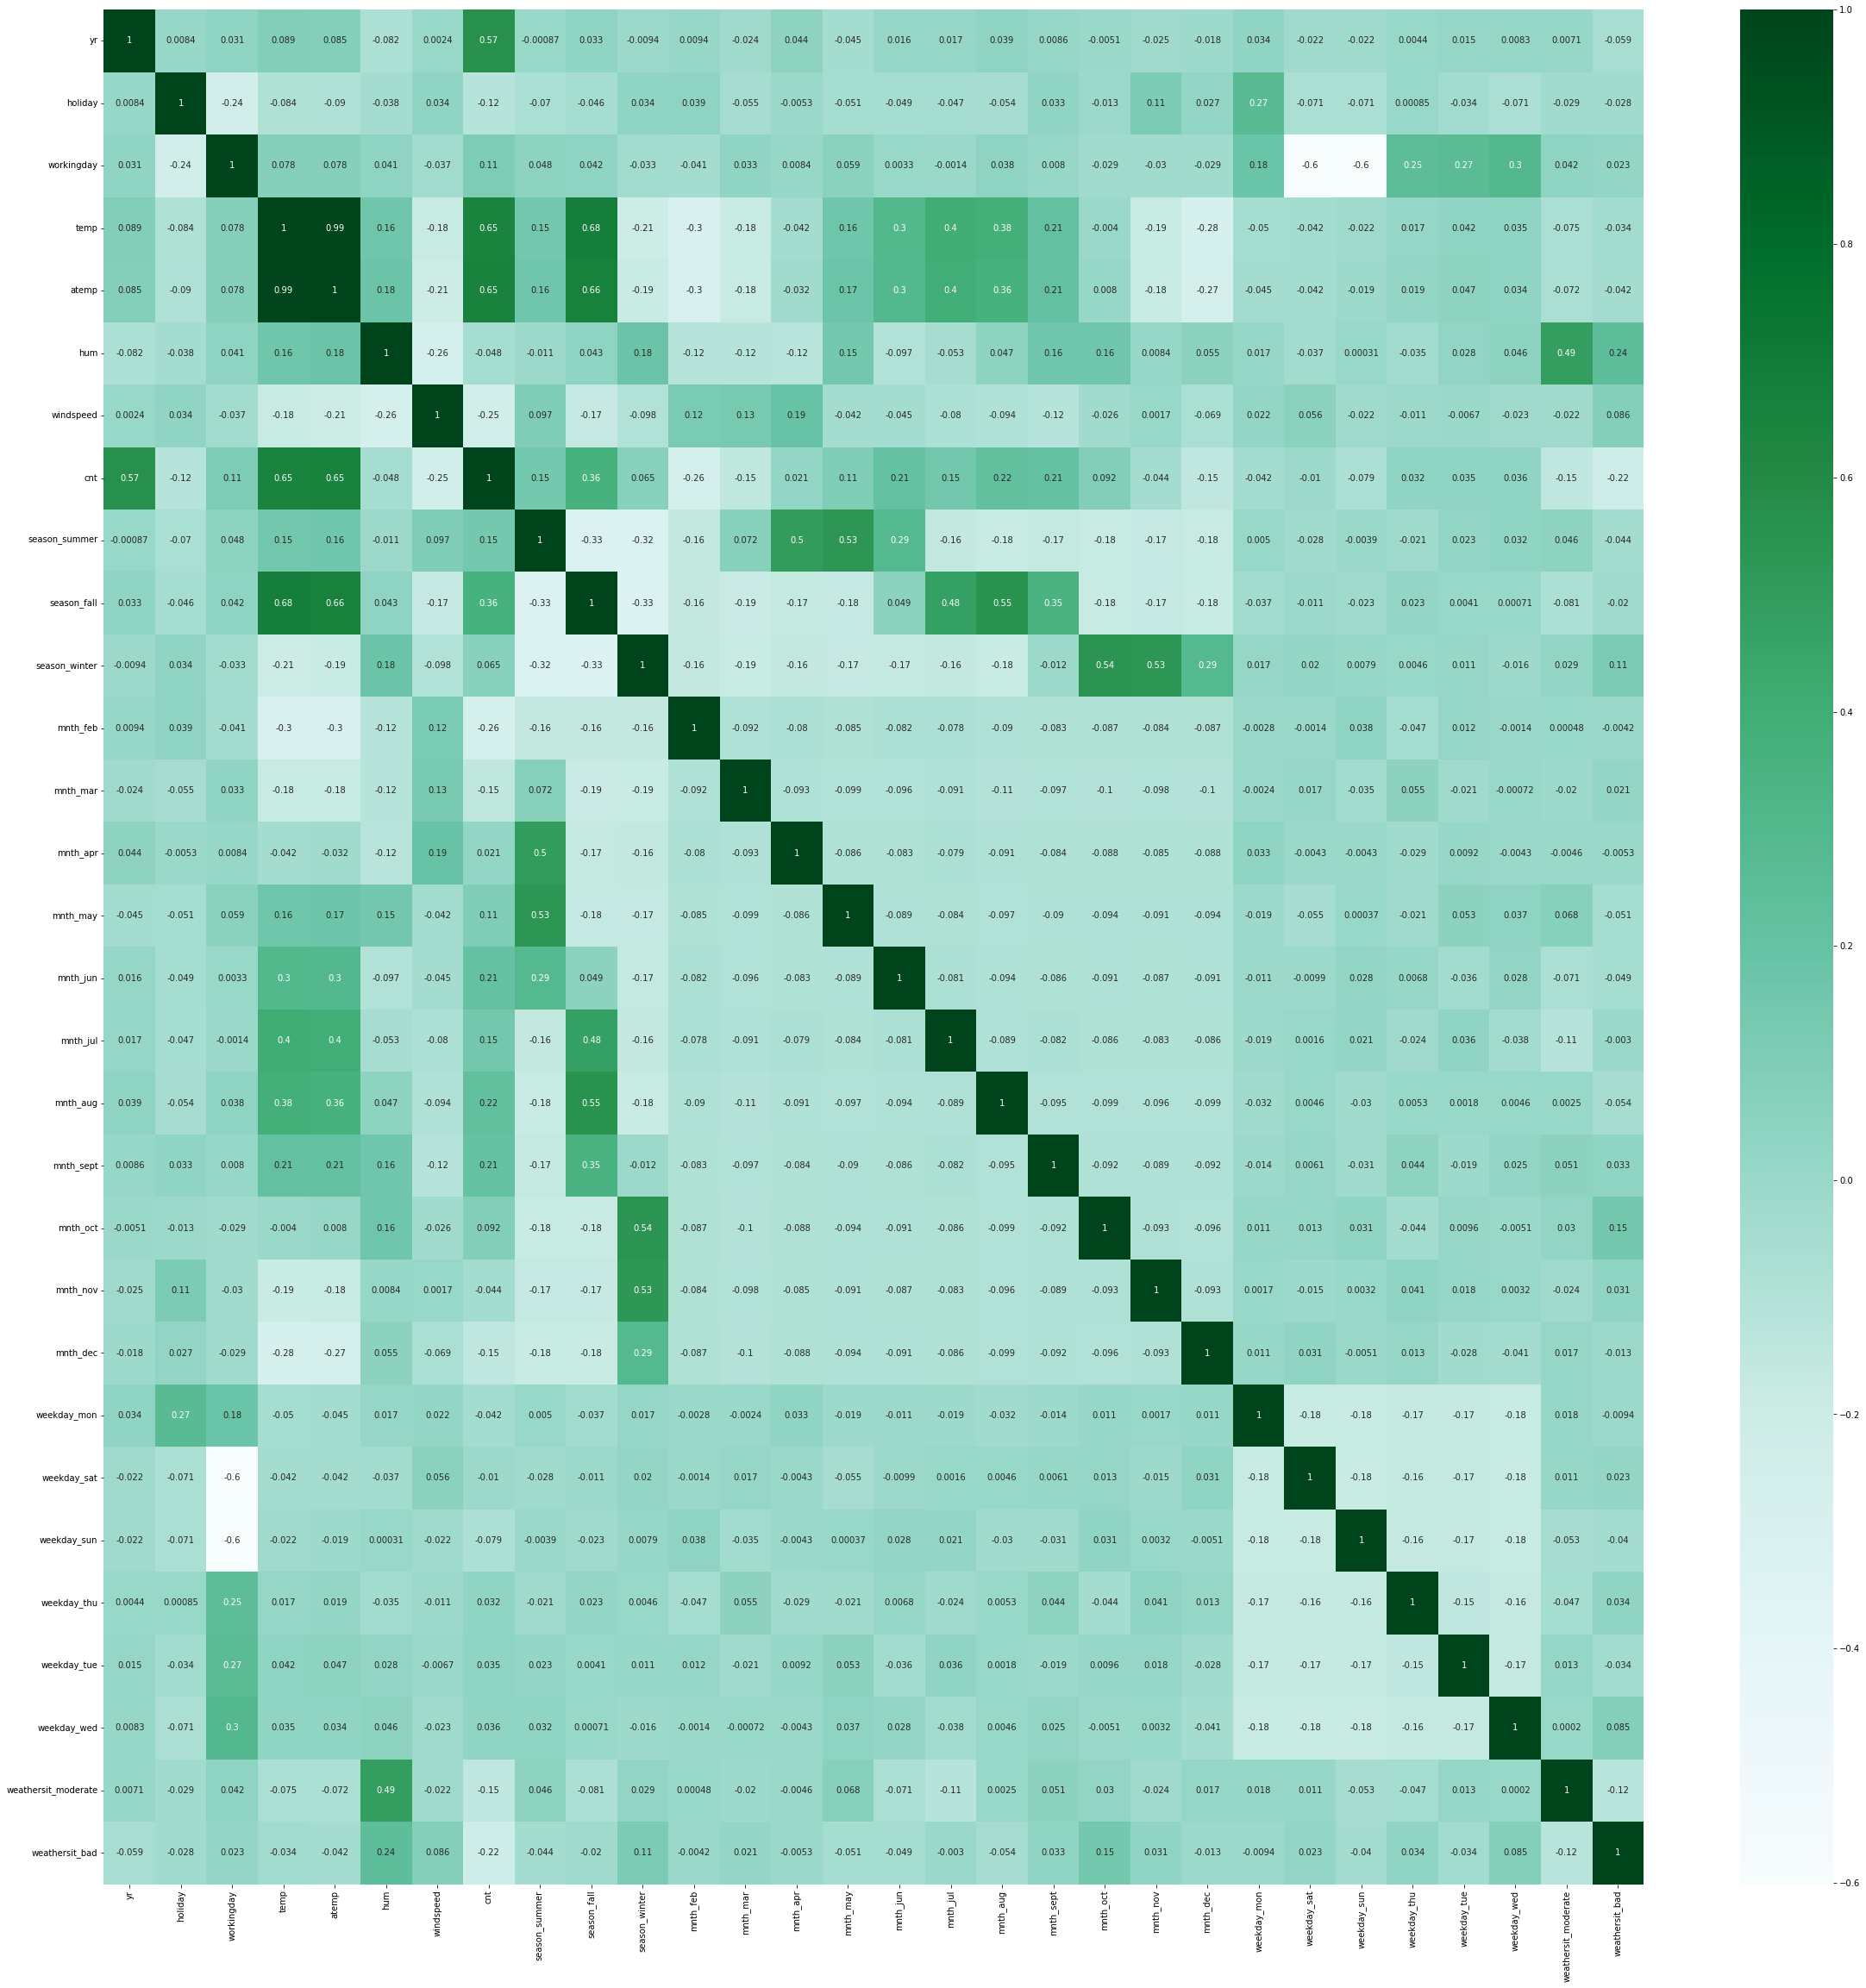

In [57]:
# Plotting a correlation matrix
plt.figure(figsize = (40, 40))
sns.heatmap(df_train.corr(), annot = True, cmap="BuGn")
plt.show()

In [58]:
# poping seperating independent and dependent variables
y_train=df_train.pop('cnt')
X_train=df_train


## 4. Build a Model

####  Model #1 

In [59]:
# Building a model with all features using statsmodels :
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

lr1 = sm.OLS(y_train, X_train_lm).fit()

lr1.params

const                  0.150386
yr                     0.230799
holiday               -0.022558
workingday             0.078823
temp                   0.391615
atemp                  0.054732
hum                   -0.146786
windspeed             -0.177329
season_summer          0.095992
season_fall            0.051909
season_winter          0.166105
mnth_feb               0.027713
mnth_mar               0.060681
mnth_apr               0.055422
mnth_may               0.076799
mnth_jun               0.068907
mnth_jul               0.024709
mnth_aug               0.079394
mnth_sept              0.141909
mnth_oct               0.065041
mnth_nov               0.011734
mnth_dec               0.005368
weekday_mon           -0.023312
weekday_sat            0.074136
weekday_sun            0.019984
weekday_thu           -0.010611
weekday_tue           -0.021888
weekday_wed           -0.008645
weathersit_moderate   -0.059812
weathersit_bad        -0.259461
dtype: float64

In [60]:
lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     110.2
Date:                Mon, 08 Apr 2024   Prob (F-statistic):          4.86e-198
Time:                        20:47:23   Log-Likelihood:                 570.73
No. Observations:                 547   AIC:                            -1083.
Df Residuals:                     518   BIC:                            -958.6
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1504      0.022      6.709      0.000       0.106       0.194
yr                      0.2308      0.008     30.023      0.000       0.216       0.246
holiday                -0.0226      0.021     -1.067      0.287      -0.064       0.019
workingday              0.0788      0.010      7.746      0.000       0.059       0.099
temp                    0.3916      0.138      2.838      0.005       0.121       0.663
atemp                   0.0547      0.136      0.404      0.686      -0.211       0.321
hum                    -0.1468      0.037     -3.934      0.000      -0.220      -0.073
windspeed              -0.1773      0.025     -7.069      0.000      -0.227      -0.128
season_summer           0.0960      0.023      4.210      0.000       0.051       0.141
season_fall             0.0519      0.028      1.828      0.068      -0.004       0.108
season_winter           0.1661      0.024      7.001      0.000       0.119       0.213
mnth_feb                0.0277      0.019      1.449      0.148      -0.010       0.065
mnth_mar                0.0607      0.021      2.880      0.004       0.019       0.102
mnth_apr                0.0554      0.032      1.720      0.086      -0.008       0.119
mnth_may                0.0768      0.035      2.222      0.027       0.009       0.145
mnth_jun                0.0689      0.037      1.878      0.061      -0.003       0.141
mnth_jul                0.0247      0.042      0.595      0.552      -0.057       0.106
mnth_aug                0.0794      0.039      2.010      0.045       0.002       0.157
mnth_sept               0.1419      0.035      4.045      0.000       0.073       0.211
mnth_oct                0.0650      0.032      2.052      0.041       0.003       0.127
mnth_nov                0.0117      0.030      0.387      0.699      -0.048       0.071
mnth_dec                0.0054      0.024      0.227      0.821      -0.041       0.052
weekday_mon            -0.0233      0.015     -1.582      0.114      -0.052       0.006
weekday_sat             0.0741      0.012      6.386      0.000       0.051       0.097
weekday_sun             0.0200      0.012      1.688      0.092      -0.003       0.043
weekday_thu            -0.0106      0.015     -0.707      0.480      -0.040       0.019
weekday_tue            -0.0219      0.015     -1.474      0.141      -0.051       0.007
weekday_wed            -0.0086      0.015     -0.596      0.551      -0.037       0.020
weathersit_moderate    -0.0598      0.010     -6.002      0.000      -0.079      -0.040
weathersit_bad         -0.2595      0.026     -9.971      0.000      -0.311      -0.208
==============================================================================
Omnibus:                       92.397   Durbin-Watson:                   2.062
Prob(Omnibus):       

In [61]:
# Here, we can see that all adjusted R-Squire is 0.848 is pretty good.Lets us see if we can reduce the independet features

In [62]:
# Since number of predictor variables is around 30. It will not be feasible to manually eliminate the insignificance variable.
# Will use hybrid (REF + manual) to elimnate insignifiance variable.

In [63]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [64]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [65]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(estimator=lm, n_features_to_select=15)   # running RFE
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 7),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_summer', True, 1),
 ('season_fall', False, 2),
 ('season_winter', True, 1),
 ('mnth_feb', False, 8),
 ('mnth_mar', False, 3),
 ('mnth_apr', False, 6),
 ('mnth_may', False, 4),
 ('mnth_jun', False, 5),
 ('mnth_jul', False, 9),
 ('mnth_aug', True, 1),
 ('mnth_sept', True, 1),
 ('mnth_oct', True, 1),
 ('mnth_nov', False, 14),
 ('mnth_dec', False, 15),
 ('weekday_mon', False, 10),
 ('weekday_sat', True, 1),
 ('weekday_sun', True, 1),
 ('weekday_thu', False, 12),
 ('weekday_tue', False, 11),
 ('weekday_wed', False, 13),
 ('weathersit_moderate', True, 1),
 ('weathersit_bad', True, 1)]

In [66]:
# RFE support Variables
col = X_train.columns[rfe.support_]
print(len(col))
col

15


Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_summer', 'season_winter', 'mnth_aug', 'mnth_sept', 'mnth_oct',
       'weekday_sat', 'weekday_sun', 'weathersit_moderate', 'weathersit_bad'],
      dtype='object')

In [67]:
# RFE not Supported Variables
X_train.columns[~rfe.support_]

Index(['atemp', 'season_fall', 'mnth_feb', 'mnth_mar', 'mnth_apr', 'mnth_may',
       'mnth_jun', 'mnth_jul', 'mnth_nov', 'mnth_dec', 'weekday_mon',
       'weekday_thu', 'weekday_tue', 'weekday_wed'],
      dtype='object')

In [68]:
# Lets consider only  the RFE supported columns for model building 
X_train_rfe = X_train[col]


In [69]:
 #Model#2 

In [70]:
# Generic function to calculate VIF of variables

def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [71]:
calculateVIF(X_train_rfe)

,Features,VIF
2,workingday,31.53
12,weekday_sun,7.97
11,weekday_sat,7.73
1,holiday,2.23
4,hum,1.88
7,season_winter,1.72
3,temp,1.61
13,weathersit_moderate,1.58
10,mnth_oct,1.52
8,mnth_aug,1.46


In [72]:
# Model 2 
#Add a constant
X_train_lm2 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr2 = sm.OLS(y_train, X_train_lm2).fit()
lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     217.2
Date:                Mon, 08 Apr 2024   Prob (F-statistic):          1.91e-209
Time:                        20:47:24   Log-Likelihood:                 561.17
No. Observations:                 547   AIC:                            -1092.
Df Residuals:                     532   BIC:                            -1028.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1565      0.021      7.491      0.000       0.115       0.198
yr                      0.2272      0.008     29.807      0.000       0.212       0.242
holiday                -0.0399      0.019     -2.081      0.038      -0.077      -0.002
workingday              0.0781      0.008      9.351      0.000       0.062       0.095
temp                    0.5361      0.021     25.313      0.000       0.494       0.578
hum                    -0.1714      0.036     -4.801      0.000      -0.242      -0.101
windspeed              -0.1817      0.024     -7.533      0.000      -0.229      -0.134
season_summer           0.1072      0.010     10.344      0.000       0.087       0.128
season_winter           0.1390      0.011     12.134      0.000       0.116       0.161
mnth_aug                0.0572      0.016      3.657      0.000       0.026       0.088
mnth_sept               0.1256      0.016      8.096      0.000       0.095       0.156
mnth_oct                0.0436      0.016      2.660      0.008       0.011       0.076
weekday_sat             0.0857      0.010      8.206      0.000       0.065       0.106
weekday_sun             0.0325      0.011      3.051      0.002       0.012       0.053
weathersit_moderate    -0.0572      0.010     -5.772      0.000      -0.077      -0.038
weathersit_bad         -0.2496      0.026     -9.742      0.000      -0.300      -0.199
==============================================================================
Omnibus:                       76.873   Durbin-Watson:                   2.072
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              196.268
Skew:                          -0.717   Prob(JB):                     2.40e-43
Kurtosis:                       5.560   Cond. No.                     3.53e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.28e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [73]:
# From abvoe analysis all the variables is having low p-values and also adjusted-R-squire value is 0.847 which is been
# increased from 0.843 to 0.847 after droping 14 features, this means most of the features were insignifiance and few were negative collrelatin
# from above VIP table we can see that workingday is having 31.53 vip value which is quite high. lets remove this featues.


In [74]:
X_train_rfe2 = X_train_rfe.drop(["workingday"], axis = 1)
X_train_rfe2.head()

,yr,holiday,temp,hum,windspeed,season_summer,season_winter,mnth_aug,mnth_sept,mnth_oct,weekday_sat,weekday_sun,weathersit_moderate,weathersit_bad
311,0,0,0.435124,0.743667,0.057471,0,1,0,0,0,0,0,0,0
523,1,0,0.735215,0.482181,0.286093,1,0,0,0,0,0,0,0,0
381,1,0,0.391151,0.737917,0.659615,0,0,0,0,0,0,0,1,0
413,1,0,0.358285,0.550880,0.319514,0,0,0,0,0,1,0,0,0
253,0,0,0.740406,0.735509,0.156398,0,0,0,1,0,0,1,0,0


In [75]:
calculateVIF(X_train_rfe2)

,Features,VIF
3,hum,14.57
2,temp,10.01
4,windspeed,3.65
6,season_winter,2.26
12,weathersit_moderate,2.16
0,yr,2.01
5,season_summer,1.86
9,mnth_oct,1.65
7,mnth_aug,1.60
8,mnth_sept,1.35


In [76]:
# Model 3 
#Add a constant
X_train_lm3 = sm.add_constant(X_train_rfe2)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()
lr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     217.2
Date:                Mon, 08 Apr 2024   Prob (F-statistic):          1.91e-209
Time:                        20:47:24   Log-Likelihood:                 561.17
No. Observations:                 547   AIC:                            -1092.
Df Residuals:                     532   BIC:                            -1028.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2346      0.026      9.089      0.000       0.184       0.285
yr                      0.2272      0.008     29.807      0.000       0.212       0.242
holiday                -0.1180      0.023     -5.043      0.000      -0.164      -0.072
temp                    0.5361      0.021     25.313      0.000       0.494       0.578
hum                    -0.1714      0.036     -4.801      0.000      -0.242      -0.101
windspeed              -0.1817      0.024     -7.533      0.000      -0.229      -0.134
season_summer           0.1072      0.010     10.344      0.000       0.087       0.128
season_winter           0.1390      0.011     12.134      0.000       0.116       0.161
mnth_aug                0.0572      0.016      3.657      0.000       0.026       0.088
mnth_sept               0.1256      0.016      8.096      0.000       0.095       0.156
mnth_oct                0.0436      0.016      2.660      0.008       0.011       0.076
weekday_sat             0.0076      0.011      0.703      0.482      -0.014       0.029
weekday_sun            -0.0456      0.011     -4.236      0.000      -0.067      -0.024
weathersit_moderate    -0.0572      0.010     -5.772      0.000      -0.077      -0.038
weathersit_bad         -0.2496      0.026     -9.742      0.000      -0.300      -0.199
==============================================================================
Omnibus:                       76.873   Durbin-Watson:                   2.072
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              196.268
Skew:                          -0.717   Prob(JB):                     2.40e-43
Kurtosis:                       5.560   Cond. No.                         18.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [77]:
# From above we can see that weekday_sat is having high pValue 0.482>0.05  and hum VIP is 14.57>5.
# Lets drop weekday_sat

In [78]:
X_train_rfe3 = X_train_rfe2.drop(["weekday_sat"], axis = 1)
X_train_rfe3.head()

,yr,holiday,temp,hum,windspeed,season_summer,season_winter,mnth_aug,mnth_sept,mnth_oct,weekday_sun,weathersit_moderate,weathersit_bad
311,0,0,0.435124,0.743667,0.057471,0,1,0,0,0,0,0,0
523,1,0,0.735215,0.482181,0.286093,1,0,0,0,0,0,0,0
381,1,0,0.391151,0.737917,0.659615,0,0,0,0,0,0,1,0
413,1,0,0.358285,0.550880,0.319514,0,0,0,0,0,0,0,0
253,0,0,0.740406,0.735509,0.156398,0,0,0,1,0,1,0,0


In [79]:

calculateVIF(X_train_rfe3)


,Features,VIF
3,hum,14.46
2,temp,10.01
4,windspeed,3.60
6,season_winter,2.26
11,weathersit_moderate,2.16
0,yr,2.01
5,season_summer,1.86
9,mnth_oct,1.65
7,mnth_aug,1.60
8,mnth_sept,1.35


In [80]:
# Model 4
#Add a constant
X_train_lm4 = sm.add_constant(X_train_rfe3)

# Create a first fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()
lr4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     234.1
Date:                Mon, 08 Apr 2024   Prob (F-statistic):          1.56e-210
Time:                        20:47:24   Log-Likelihood:                 560.92
No. Observations:                 547   AIC:                            -1094.
Df Residuals:                     533   BIC:                            -1034.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2366      0.026      9.229      0.000       0.186       0.287
yr                      0.2270      0.008     29.813      0.000       0.212       0.242
holiday                -0.1195      0.023     -5.131      0.000      -0.165      -0.074
temp                    0.5356      0.021     25.316      0.000       0.494       0.577
hum                    -0.1723      0.036     -4.833      0.000      -0.242      -0.102
windspeed              -0.1810      0.024     -7.514      0.000      -0.228      -0.134
season_summer           0.1071      0.010     10.339      0.000       0.087       0.127
season_winter           0.1391      0.011     12.150      0.000       0.117       0.162
mnth_aug                0.0574      0.016      3.672      0.000       0.027       0.088
mnth_sept               0.1259      0.016      8.118      0.000       0.095       0.156
mnth_oct                0.0438      0.016      2.671      0.008       0.012       0.076
weekday_sun            -0.0470      0.011     -4.442      0.000      -0.068      -0.026
weathersit_moderate    -0.0571      0.010     -5.763      0.000      -0.077      -0.038
weathersit_bad         -0.2493      0.026     -9.737      0.000      -0.300      -0.199
==============================================================================
Omnibus:                       74.555   Durbin-Watson:                   2.072
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              195.284
Skew:                          -0.688   Prob(JB):                     3.93e-43
Kurtosis:                       5.583   Cond. No.                         18.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [81]:
# we can see that Adj. R-squire is 0.847 and pvalue is less than 0.05 for every features.
# VIP for hum is 14.57>5.so Lets frist remove the hum.


In [82]:
X_train_rfe4 = X_train_rfe3.drop(["hum"], axis = 1)
X_train_rfe4.head()

,yr,holiday,temp,windspeed,season_summer,season_winter,mnth_aug,mnth_sept,mnth_oct,weekday_sun,weathersit_moderate,weathersit_bad
311,0,0,0.435124,0.057471,0,1,0,0,0,0,0,0
523,1,0,0.735215,0.286093,1,0,0,0,0,0,0,0
381,1,0,0.391151,0.659615,0,0,0,0,0,0,1,0
413,1,0,0.358285,0.319514,0,0,0,0,0,0,0,0
253,0,0,0.740406,0.156398,0,0,0,1,0,1,0,0


In [83]:
calculateVIF(X_train_rfe4)

,Features,VIF
2,temp,5.33
3,windspeed,3.12
0,yr,1.99
5,season_winter,1.96
4,season_summer,1.86
8,mnth_oct,1.63
6,mnth_aug,1.60
10,weathersit_moderate,1.51
7,mnth_sept,1.35
9,weekday_sun,1.17


In [84]:
X_train_lm5 = sm.add_constant(X_train_rfe4)

# Create a first fitted model
lr5 = sm.OLS(y_train, X_train_lm5).fit()
lr5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     241.6
Date:                Mon, 08 Apr 2024   Prob (F-statistic):          8.67e-207
Time:                        20:47:24   Log-Likelihood:                 549.19
No. Observations:                 547   AIC:                            -1072.
Df Residuals:                     534   BIC:                            -1016.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1376      0.016      8.744      0.000       0.107       0.169
yr                      0.2311      0.008     29.921      0.000       0.216       0.246
holiday                -0.1208      0.024     -5.083      0.000      -0.168      -0.074
temp                    0.5155      0.021     24.346      0.000       0.474       0.557
windspeed              -0.1486      0.024     -6.291      0.000      -0.195      -0.102
season_summer           0.1048      0.011      9.926      0.000       0.084       0.126
season_winter           0.1310      0.012     11.334      0.000       0.108       0.154
mnth_aug                0.0558      0.016      3.497      0.001       0.024       0.087
mnth_sept               0.1193      0.016      7.569      0.000       0.088       0.150
mnth_oct                0.0408      0.017      2.440      0.015       0.008       0.074
weekday_sun            -0.0497      0.011     -4.610      0.000      -0.071      -0.029
weathersit_moderate    -0.0847      0.008    -10.255      0.000      -0.101      -0.068
weathersit_bad         -0.2958      0.024    -12.211      0.000      -0.343      -0.248
==============================================================================
Omnibus:                       72.861   Durbin-Watson:                   2.082
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              191.226
Skew:                          -0.672   Prob(JB):                     2.99e-42
Kurtosis:                       5.566   Cond. No.                         10.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [85]:
#From the above  Model Summary Report we can say that all the p-values of respective features are less than 0.05.
# Note: It is a hurestic approach that, if VIF value of any predictor is between 5 & 10, it is recommended to scrutinize such variable from business perspective and analyse any outliers & drop such feature if VIF is greater than 10
# So we can now fix this 

### 5. Linear Regrssion Assumptions Proofs
#### Residual Analysis

In [86]:
# Lets perform Residual Analysis
y_train_pred = lr5.predict(X_train_lm5)
residual = y_train_pred - y_train

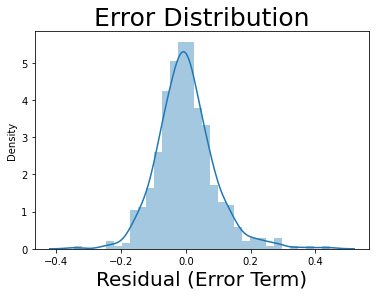

In [87]:
#1. Assumption of Normally Distributed Error Term

# Plot the histogram of the error terms
sns.distplot(residual)
plt.xlabel('Residual (Error Term)', fontdict={'fontsize': 20})
plt.title('Error Distribution', fontdict={'fontsize': 25})
plt.show() 


In [88]:
#Inferences: From the above graph it is evident that Error Distribution Is Normallly Distributed Across 0, which indicates that our model has handled the assumption of Error Normal Distribution properly.


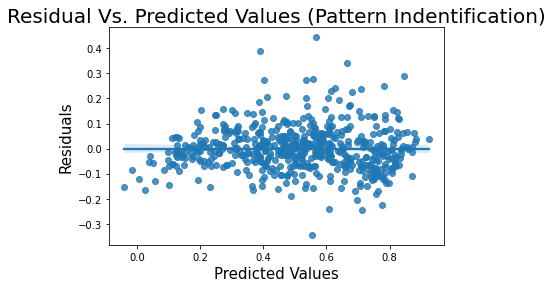

In [89]:
#2 Assumption of Error Terms Being Independent

sns.regplot(x=y_train_pred, y=residual)
plt.title('Residual Vs. Predicted Values (Pattern Indentification)', fontdict={'fontsize': 20})
plt.xlabel('Predicted Values', fontdict={'fontsize': 15})
plt.ylabel('Residuals', fontdict={'fontsize': 15})
plt.show()

In [90]:
#From the above graph, we see that there is almost no relation between Residual & Predicted Value

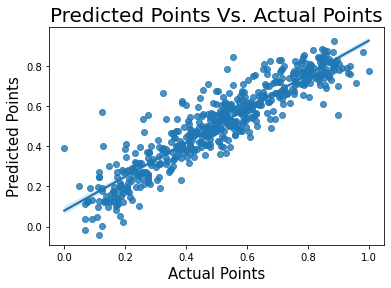

In [91]:
# 3. Homoscedasticity

sns.regplot(x=y_train, y=y_train_pred)
plt.title('Predicted Points Vs. Actual Points', fontdict={'fontsize': 20})
plt.xlabel('Actual Points', fontdict={'fontsize': 15})
plt.ylabel('Predicted Points', fontdict={'fontsize': 15})
plt.show()

In [92]:
# we can see that variance is  similar from both end of fitted line.

In [93]:
# Multicorrelation
calculateVIF(X_train_rfe4)

,Features,VIF
2,temp,5.33
3,windspeed,3.12
0,yr,1.99
5,season_winter,1.96
4,season_summer,1.86
8,mnth_oct,1.63
6,mnth_aug,1.60
10,weathersit_moderate,1.51
7,mnth_sept,1.35
9,weekday_sun,1.17


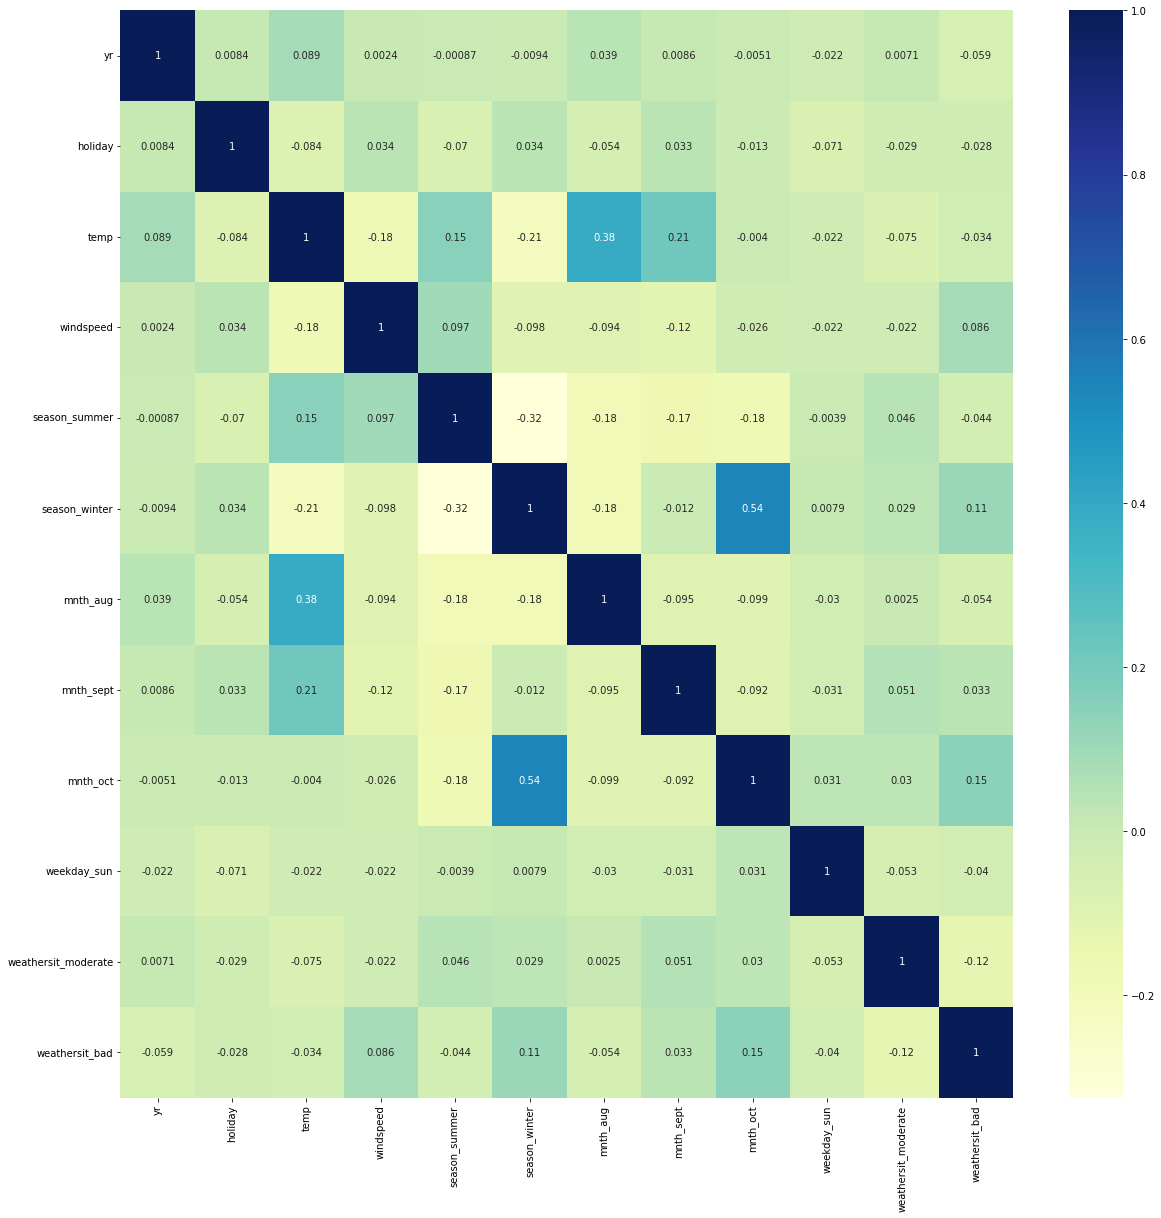

In [94]:
plt.figure(figsize = (20, 20))
# Heatmap
sns.heatmap(X_train_rfe4.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [95]:
# As per above analysis we didn't found multi-colinearity among independedt variables.

### 6. Model Prediction on Test Data

In [96]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [97]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_summer,season_fall,...,mnth_nov,mnth_dec,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_moderate,weathersit_bad
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,1,...,0,0,1,0,0,0,0,0,1,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,1,0,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,0,0,0,1,0,0,1,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,1,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,1,0,...,0,0,0,0,0,1,0,0,0,0


In [98]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_summer,season_fall,...,mnth_nov,mnth_dec,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_moderate,weathersit_bad
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,...,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,0.475410,0.032787,0.726776,0.568688,0.542076,0.635166,0.316439,0.530233,0.273224,0.273224,...,0.081967,0.076503,0.114754,0.120219,0.120219,0.174863,0.163934,0.109290,0.300546,0.032787
std,0.500765,0.178567,0.446837,0.234887,0.219336,0.152926,0.159371,0.215783,0.446837,0.446837,...,0.275067,0.266530,0.319599,0.326109,0.326109,0.380892,0.371232,0.312858,0.459754,0.178567
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.362754,0.354867,0.522601,0.199183,0.393293,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.575304,0.558309,0.618721,0.303464,0.533134,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.774153,0.729061,0.735079,0.404383,0.681086,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [99]:
# divie into x and y
y_test = df_test.pop('cnt')
X_test = df_test
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 184 to 189
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   yr                   183 non-null    int64  
 1   holiday              183 non-null    int64  
 2   workingday           183 non-null    int64  
 3   temp                 183 non-null    float64
 4   atemp                183 non-null    float64
 5   hum                  183 non-null    float64
 6   windspeed            183 non-null    float64
 7   season_summer        183 non-null    uint8  
 8   season_fall          183 non-null    uint8  
 9   season_winter        183 non-null    uint8  
 10  mnth_feb             183 non-null    uint8  
 11  mnth_mar             183 non-null    uint8  
 12  mnth_apr             183 non-null    uint8  
 13  mnth_may             183 non-null    uint8  
 14  mnth_jun             183 non-null    uint8  
 15  mnth_jul             183 non-null    u

In [100]:
X_test=X_test[X_train_rfe4.columns]
# Adding constant variable to test dataframe
X_test_lr5 = sm.add_constant(X_test)
X_test_lr5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 184 to 189
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   const                183 non-null    float64
 1   yr                   183 non-null    int64  
 2   holiday              183 non-null    int64  
 3   temp                 183 non-null    float64
 4   windspeed            183 non-null    float64
 5   season_summer        183 non-null    uint8  
 6   season_winter        183 non-null    uint8  
 7   mnth_aug             183 non-null    uint8  
 8   mnth_sept            183 non-null    uint8  
 9   mnth_oct             183 non-null    uint8  
 10  weekday_sun          183 non-null    uint8  
 11  weathersit_moderate  183 non-null    uint8  
 12  weathersit_bad       183 non-null    uint8  
dtypes: float64(3), int64(2), uint8(8)
memory usage: 10.0 KB


In [101]:
y_test_pred = lr5.predict(X_test_lr5)


In [102]:
 lr5.params

const                  0.137643
yr                     0.231135
holiday               -0.120818
temp                   0.515527
windspeed             -0.148559
season_summer          0.104833
season_winter          0.131022
mnth_aug               0.055815
mnth_sept              0.119327
mnth_oct               0.040805
weekday_sun           -0.049686
weathersit_moderate   -0.084705
weathersit_bad        -0.295816
dtype: float64

### 7. Generating R-Square

In [103]:
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.7795576077290951

In [104]:
train_adjuested_r_2=0.841
train_r2=0.844

In [105]:
# n is number of rows in X

n = X_test.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula

test_adjusted_r2 = 1-(1-train_r2)*(n-1)/(n-p-1)
test_adjusted_r2

0.8329882352941176

In [106]:
# Train R-squire=0.844
# Test R-squire=0.7795
# Train Adj-R-squire=0.841
# Test Adj-R-squire=0.832
# That seems a very good models.